In [2]:
#CSV to Pandas to Graph

import pandas as pd
import networkx as nx
import csv

df = pd.read_csv("fp-aktivis.csv")

#Membuat hubungan antar nama dengan atribut lainnya
df1= df[['nama', 'kota_terkait']].dropna(axis = 0, how ='any')
df2= df[['nama', 'kota_lahir']].dropna(axis = 0, how ='any')
df3= df[['nama', 'partai']].dropna(axis = 0, how ='any')

#Manambahkan hubungan node yang telah dibuat ke obj g
g = nx.from_pandas_edgelist(df1, source='nama', target='kota_terkait')
g.add_edges_from(df2.values.tolist())
g.add_edges_from(df3.values.tolist())
#g.edges()

EdgeView([('Anies Baswedan', 'Jakarta'), ('Anies Baswedan', 'Yogyakarta'), ('Anies Baswedan', 'Partai Republik'), ('Jakarta', 'Ayu Utami'), ('Jakarta', 'Dita Indah Sari'), ('Jakarta', 'Komaruddin Hidayat'), ('Jakarta', 'Marsinah'), ('Jakarta', 'Munir Said Thalib'), ('Jakarta', 'Satrio Arismunandar'), ('Jakarta', 'Soe Hok Gie'), ('Jakarta', 'Widji Thukul'), ('Jakarta', 'Y. B. Mangunwijaya'), ('Jakarta', 'Yap Yun Hap'), ('Jakarta', 'Hendriawan Sie'), ('Jakarta', 'A. Patra M. Zen'), ('Jakarta', 'Franky Sahilatua'), ('Jakarta', 'Maria Catarina Sumarsih'), ('Jakarta', 'Gadis Arivia'), ('Jakarta', 'Ubedilah Badrun'), ('Jakarta', 'Rama Pratama'), ('Jakarta', 'Indra J. Piliang'), ('Jakarta', 'Sjahrir (ekonom)'), ('Jakarta', 'Suparna Sastra Diredja'), ('Jakarta', 'Musdah Mulia'), ('Jakarta', 'Julius Usman'), ('Jakarta', 'Mien Soedarpo'), ('Jakarta', 'Yeni Rosa Damayanti'), ('Jakarta', 'Utami Roesli'), ('Jakarta', 'Fahira Fahmi Idris'), ('Jakarta', 'Yetty Rizali Noor'), ('Jakarta', 'Yozar Anwar'

Text(0.5, 0.98, 'Simple Graph')

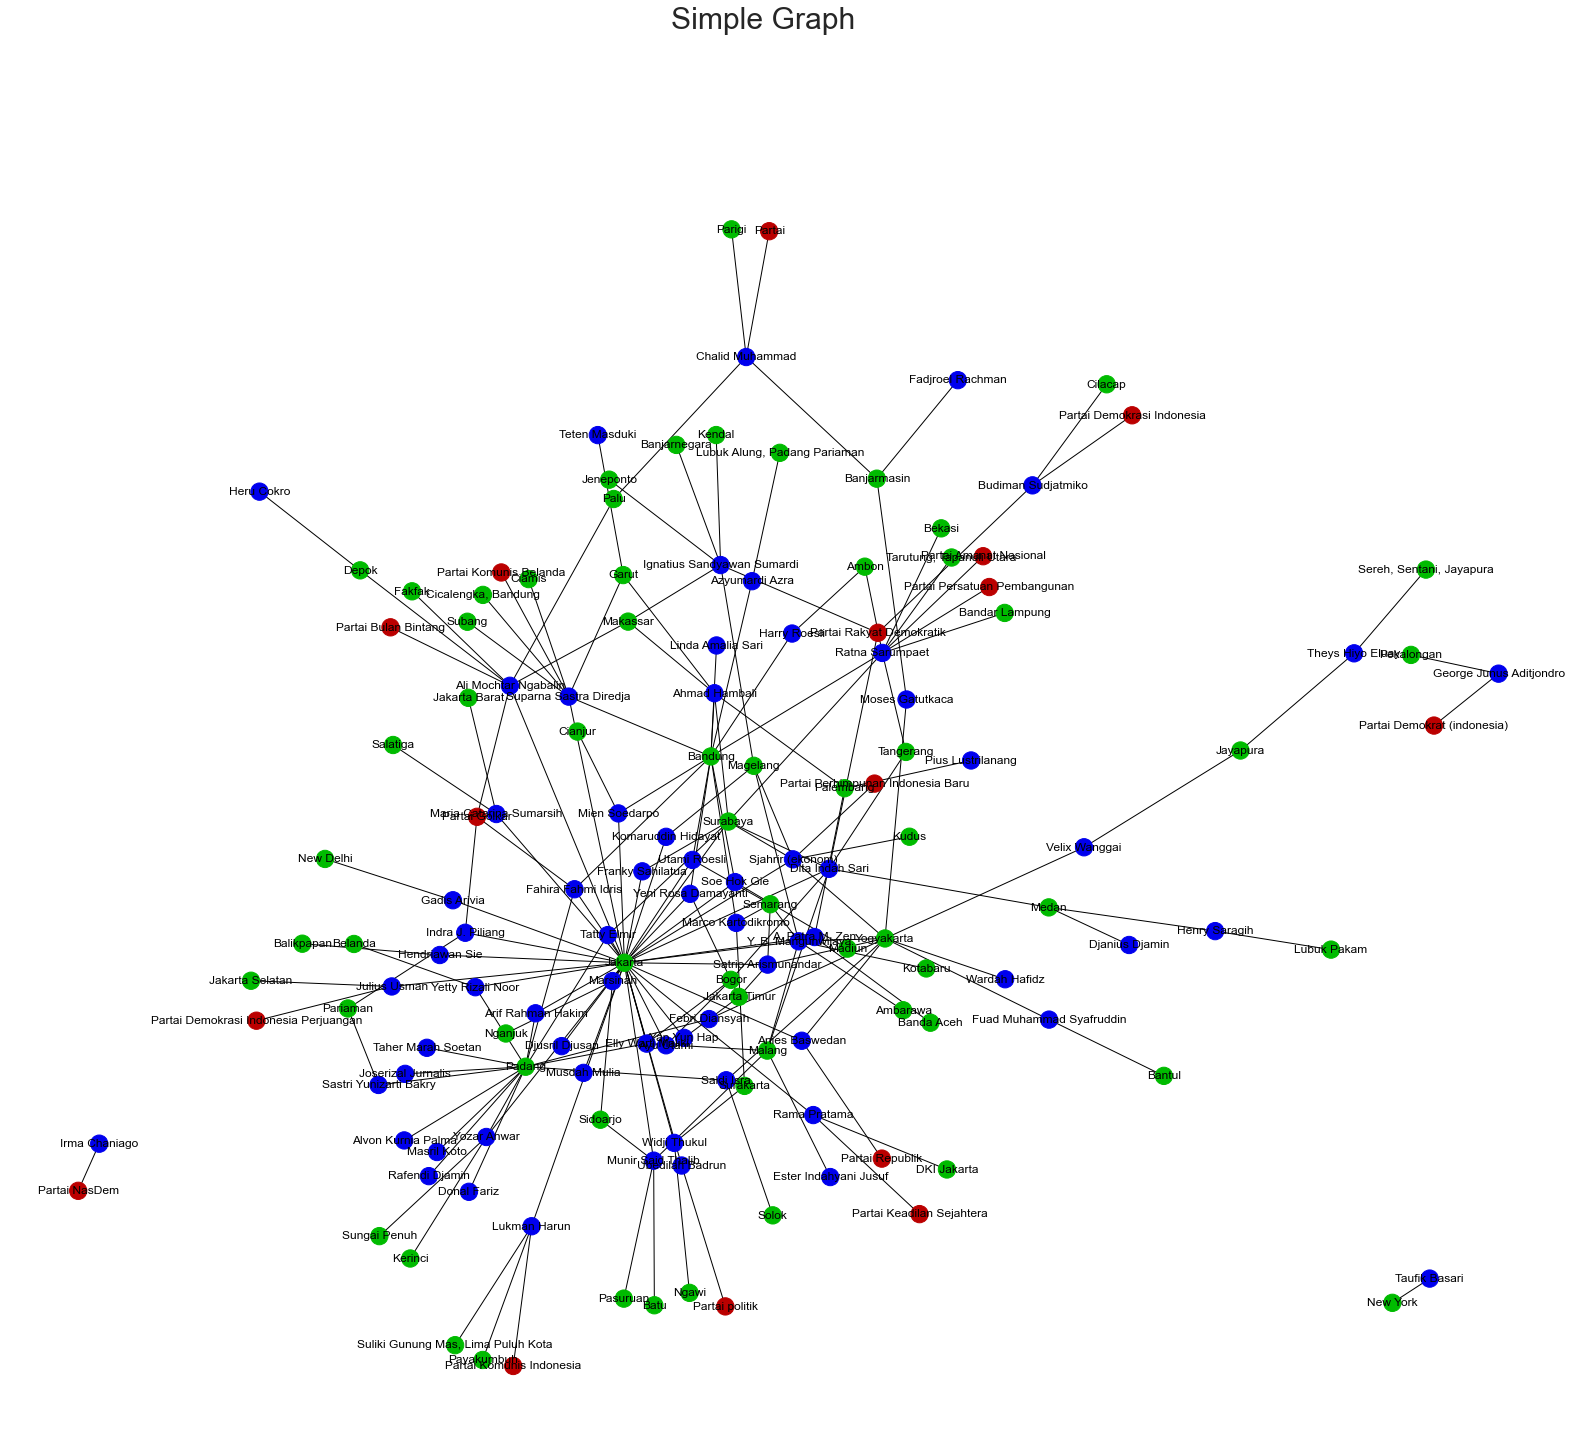

In [219]:
#Visualisasi Graph

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

labels = [i for i in dict(g.nodes).keys()]
labels = {i:i for i in dict(g.nodes).keys()}
fig, ax = plt.subplots(figsize=(28,23))

layout = nx.spring_layout(g,iterations=50, k=0.15)

warna = []
for node in g:
    if node in df['kota_terkait'].values:
        warna.append("#00BB00")
    elif node in df['kota_lahir'].values:
        warna.append("#00BB00")
    elif node in df['partai'].values: 
        warna.append("#BB0000")
    else: warna.append("#0000EE")
        
nx.draw_networkx_nodes(g, layout, ax = ax, labels=True, node_color= warna)
nx.draw_networkx_edges(g, layout, ax=ax)
_ = nx.draw_networkx_labels(g, layout, labels, ax=ax)
plt.axis('off')
plt.suptitle('Simple Graph',fontsize=30)

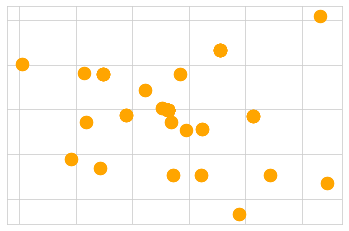

In [161]:
#Visualisasi Dosen Populer

kota_rame = [aktivis for aktivis in df1.kota_terkait if g.degree(aktivis) > 1]
nx.draw_networkx_nodes(g, layout, nodelist=kota_rame, node_color='orange', node_size=150)

In [22]:
#Density
density = nx.density(g)
print("Density: ", density)

Density:  0.01761252446183953


In [125]:
#Degree setiap Node
degree_dict = dict(g.degree(g.nodes()))
#print(dir(degree_dict))

#Degree terbesar
from operator import itemgetter

deg_sort= sorted(degree_dict.items(), key=itemgetter(1), reverse=True)


print("5 degree terbesar: ")
for a in deg_sort[:5]:
    print(a)
print("")
    
itr= 0
print("Kota 5 degree terbesar: ")
for node, degree in deg_sort:
    if itr >= 5:
        break
    if node in df['kota_terkait'].values or node in df['kota_lahir'].values:
        print(node +" : " +str(degree))
        itr= itr+1
print("")
        
itr= 0
print("Partai 5 degree terbesar: ")
for node, degree in deg_sort:
    if itr >= 5:
        break
    if node in df['partai'].values:
        print(node +" : " +str(degree))
        itr= itr+1

5 degree terbesar: 
('Jakarta', 35)
('Padang', 15)
('Bandung', 12)
('Yogyakarta', 10)
('Ratna Sarumpaet', 9)

Kota 5 degree terbesar: 
Jakarta : 35
Padang : 15
Bandung : 12
Yogyakarta : 10
Surabaya : 7

Partai 6 degree terbesar: 
Partai Rakyat Demokratik : 3
Partai Golkar : 3
Partai Republik : 1
Partai Demokrasi Indonesia : 1
Partai Demokrat (indonesia) : 1
Partai Amanat Nasional : 1


Text(0.5, 0.98, 'Degree Graph')

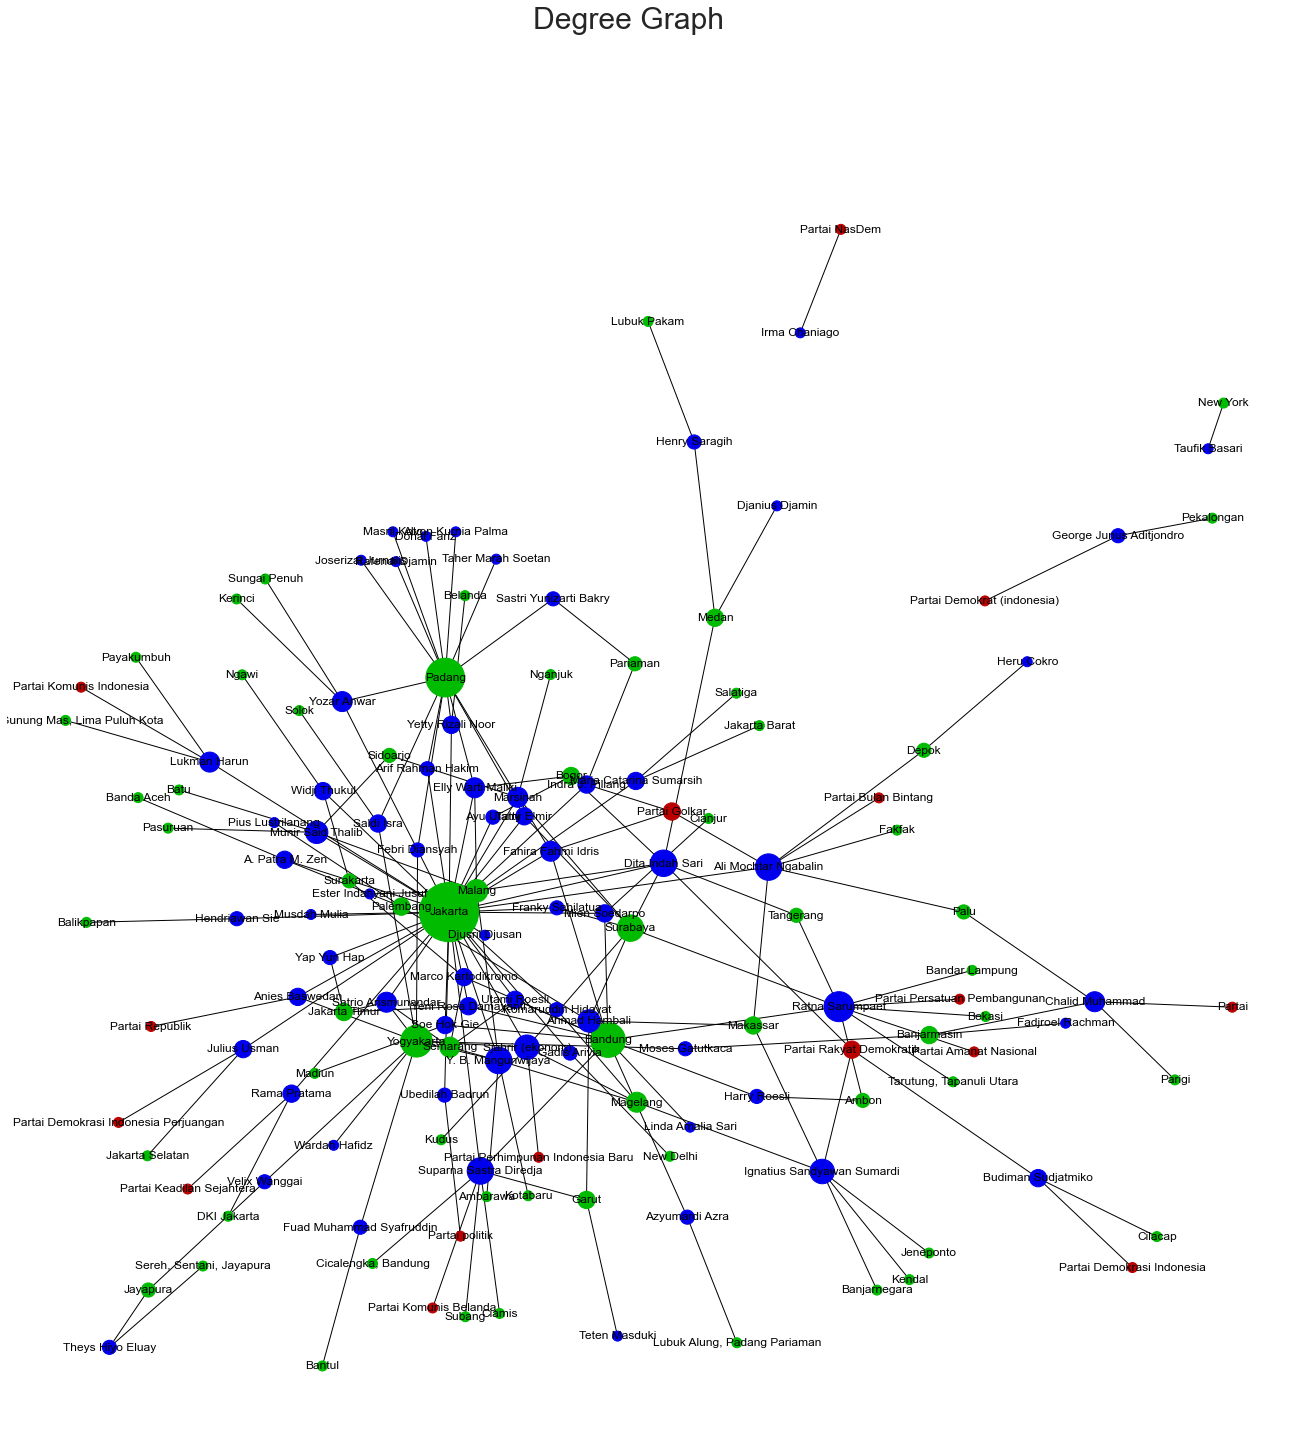

In [221]:
#Visualiasi Degree

import matplotlib.pyplot as plt

pos = nx.spring_layout(g, k=0.15)

node_color = [20000.0 * g.degree(v) for v in g]

warna = []
for node in g:
    if node in df['kota_terkait'].values:
        warna.append("#00BB00")
    elif node in df['kota_lahir'].values:
        warna.append("#00BB00")
    elif node in df['partai'].values: 
        warna.append("#BB0000")
    else: warna.append("#0000EE")
        
font_color = []
for col in node_color:
    if col < 60000.0:
        font_color.append("#AAAAAAFF")
    else:
        font_color.append("#000000FF")
        
node_size = [v * 100 for v in degree_dict.values()]

plt.figure(figsize=(23,23))
nx.draw_networkx(g, pos=pos, with_labels=True,
    node_color= warna,
    node_size=node_size )
plt.axis('off')
plt.suptitle('Degree Graph',fontsize=30)

Text(0.5, 0.98, 'Eigenvector Graph')

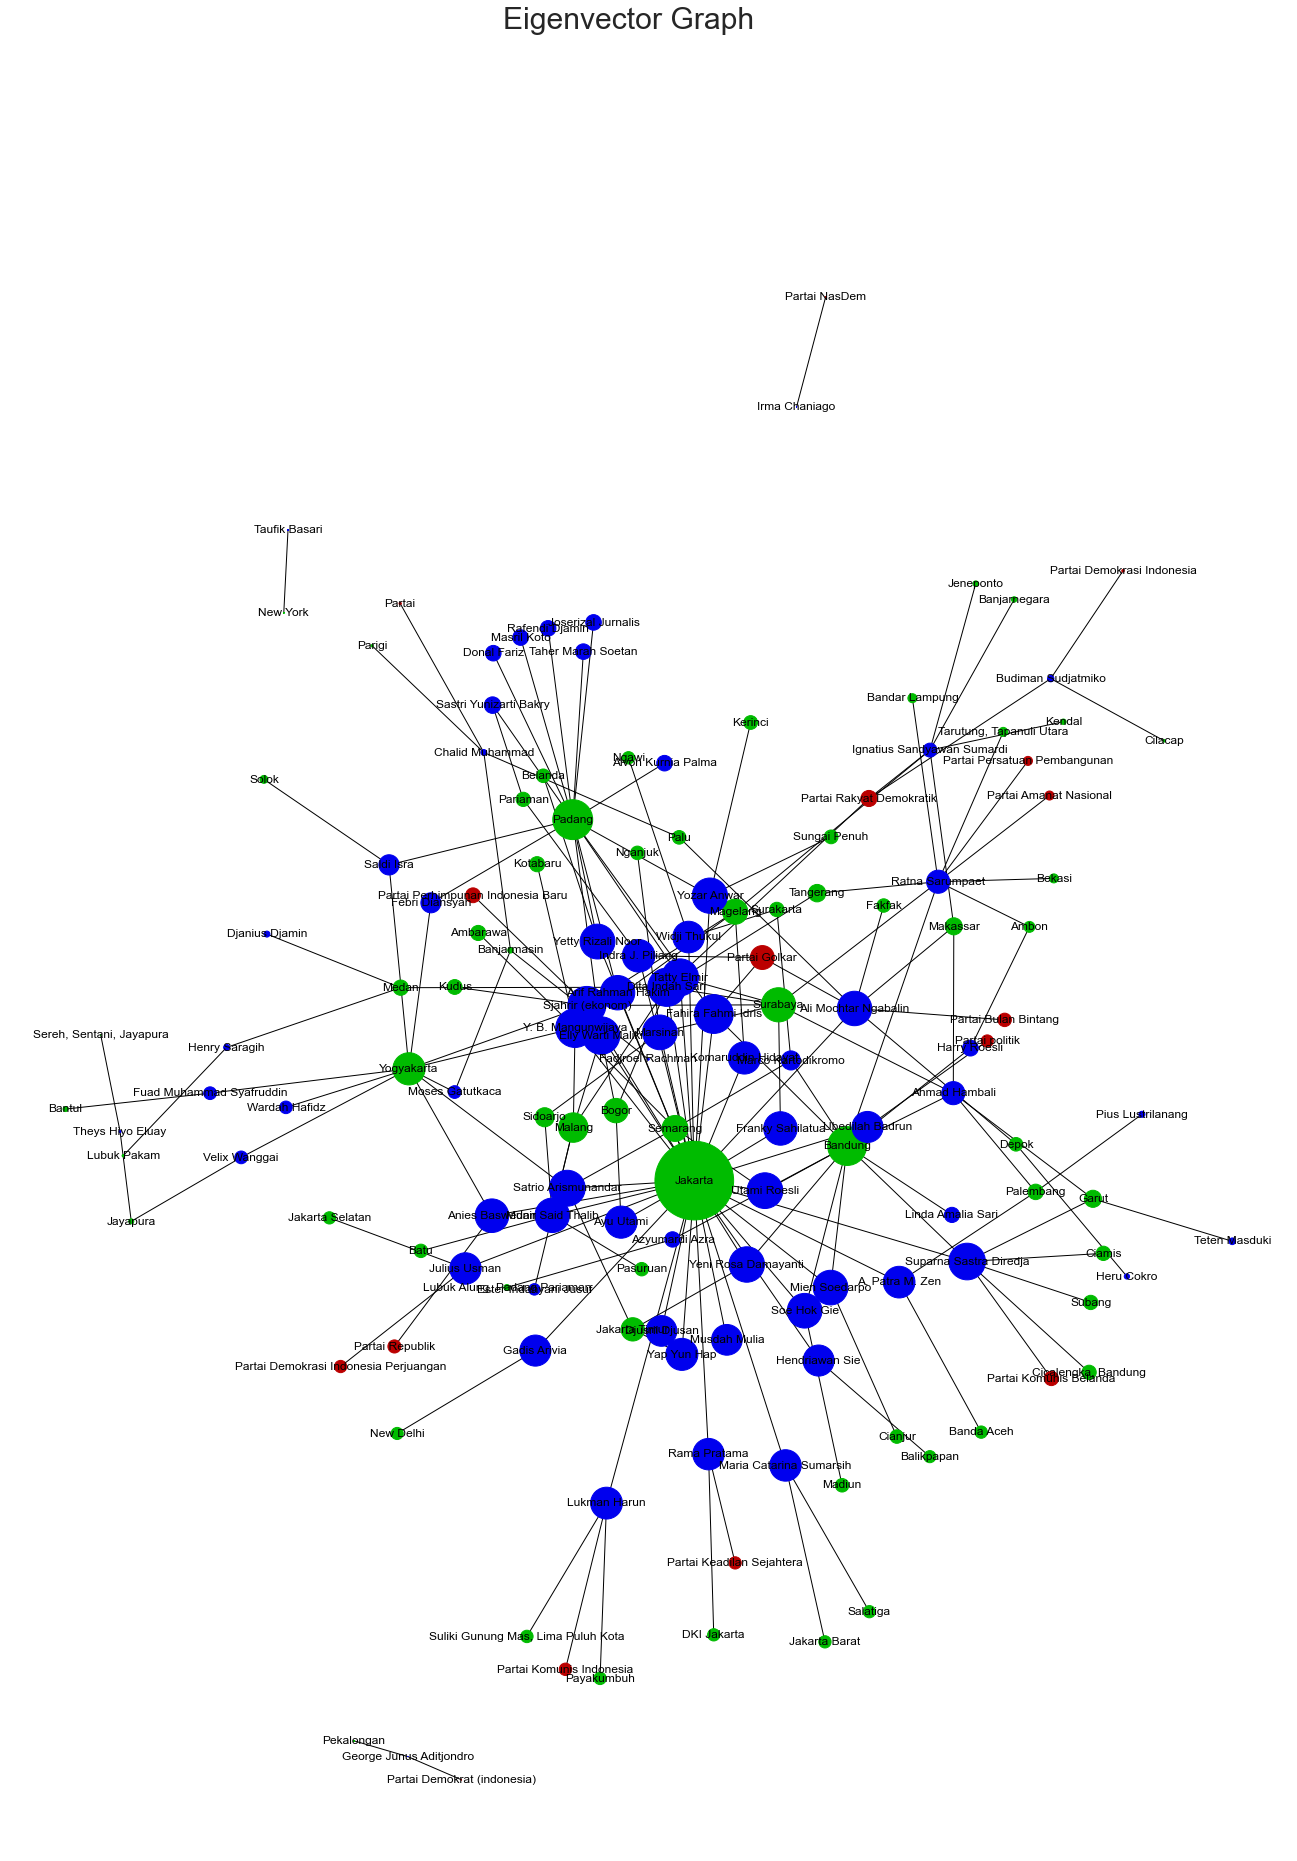

In [222]:
#Algoritma Eigenvector 

eigenvector_dict = nx.eigenvector_centrality(g)
nx.set_node_attributes(g, eigenvector_dict, 'eigenvector')

pos = nx.spring_layout(g, k=0.2)

node_color = [20000.0 * eigenvector_dict[v] for v in g]

warna = []
for node in g:
    if node in df['kota_terkait'].values:
        warna.append("#00BB00")
    elif node in df['kota_lahir'].values:
        warna.append("#00BB00")
    elif node in df['partai'].values: 
        warna.append("#BB0000")
    else: warna.append("#0000EE")
        
node_size = [v * 10000 for v in eigenvector_dict.values()]

plt.figure(figsize=(23,30))
nx.draw_networkx(g, pos=pos, 
    with_labels=True,
    node_color = warna,
    node_size = node_size)
plt.axis('off') 
plt.suptitle('Eigenvector Graph',fontsize=30)

In [41]:
#Algoritma Centrality Lainnya

eigenvector_dict = nx.eigenvector_centrality(g)
closeness_dict = nx.closeness_centrality(g)
harmonic_dict = nx.harmonic_centrality(g)
betweenness_dict = nx.betweenness_centrality(g) 

In [42]:
#Nilai Terbesar EigenVector

from operator import itemgetter

urutan_eigen= sorted(eigenvector_dict.items(), key=itemgetter(1), reverse=True)
print("Lima besar EigenVector centrality:")
for b in urutan_eigen[:5]:
 print(b)
print("")

itr= 0
print("Kota 5 EigenVector terbesar: ")
for node, eigen in urutan_eigen:
    if itr >= 5:
        break
    if node in df['kota_terkait'].values or node in df['kota_lahir'].values:
        print(node +" : " +str(eigen))
        itr= itr+1

Lima besar EigenVector centrality:
('Jakarta', 0.6189396363636989)
('Padang', 0.1592856139072455)
('Bandung', 0.15121025547729322)
('Fahira Fahmi Idris', 0.1502753113277305)
('Y. B. Mangunwijaya', 0.15024959924567613)

Kota 5 EigenVector terbesar: 
Jakarta : 0.6189396363636989
Padang : 0.1592856139072455
Bandung : 0.15121025547729322
Surabaya : 0.11674194217257158
Yogyakarta : 0.10380458395771906


In [169]:
#Subgraph

components = nx.connected_components(g)
largest_component = max(components, key=len)
subgraph = g.subgraph(largest_component)
diameter = nx.diameter(subgraph)
print("Network diameter dengan komponen terbesar:", diameter)

Network diameter dengan komponen terbesar: 10


In [247]:
#Algoritma Community

from networkx.algorithms import community

communities = community.girvan_newman(g)
daftar_dict = {}
i=0
for c in next(communities):
# print(c)
 for name in c:
     daftar_dict [name] = i
     i=i+1
community_df= pd.DataFrame.from_dict(daftar_dict, orient='index',columns=['komunitas'])

{'Arif Rahman Hakim', 'Yogyakarta', 'Gadis Arivia', 'Azyumardi Azra', 'Tatty Elmir', 'New Delhi', 'Semarang', 'Ngawi', 'Jayapura', 'Madiun', 'Kendal', 'Salatiga', 'Cilacap', 'Musdah Mulia', 'Payakumbuh', 'Alvon Kurnia Palma', 'Cianjur', 'Jakarta Timur', 'Banjarnegara', 'Partai Golkar', 'Djanius Djamin', 'Partai Bulan Bintang', 'Banjarmasin', 'Utami Roesli', 'Masril Koto', 'Fuad Muhammad Syafruddin', 'Ambon', 'Malang', 'Kudus', 'Jakarta Barat', 'Fakfak', 'Wardah Hafidz', 'Elly Warti Maliki', 'Makassar', 'Partai Rakyat Demokratik', 'Partai Demokrasi Indonesia', 'Yozar Anwar', 'Medan', 'Rafendi Djamin', 'Mien Soedarpo', 'Marsinah', 'Febri Diansyah', 'Pius Lustrilanang', 'Partai', 'Chalid Muhammad', 'Hendriawan Sie', 'Kotabaru', 'Tangerang', 'Linda Amalia Sari', 'Saldi Isra', 'Ester Indahyani Jusuf', 'Komaruddin Hidayat', 'Partai politik', 'Soe Hok Gie', 'Nganjuk', 'Solok', 'Partai Perhimpunan Indonesia Baru', 'Suliki Gunung Mas, Lima Puluh Kota', 'Ayu Utami', 'Tarutung, Tapanuli Utara', '

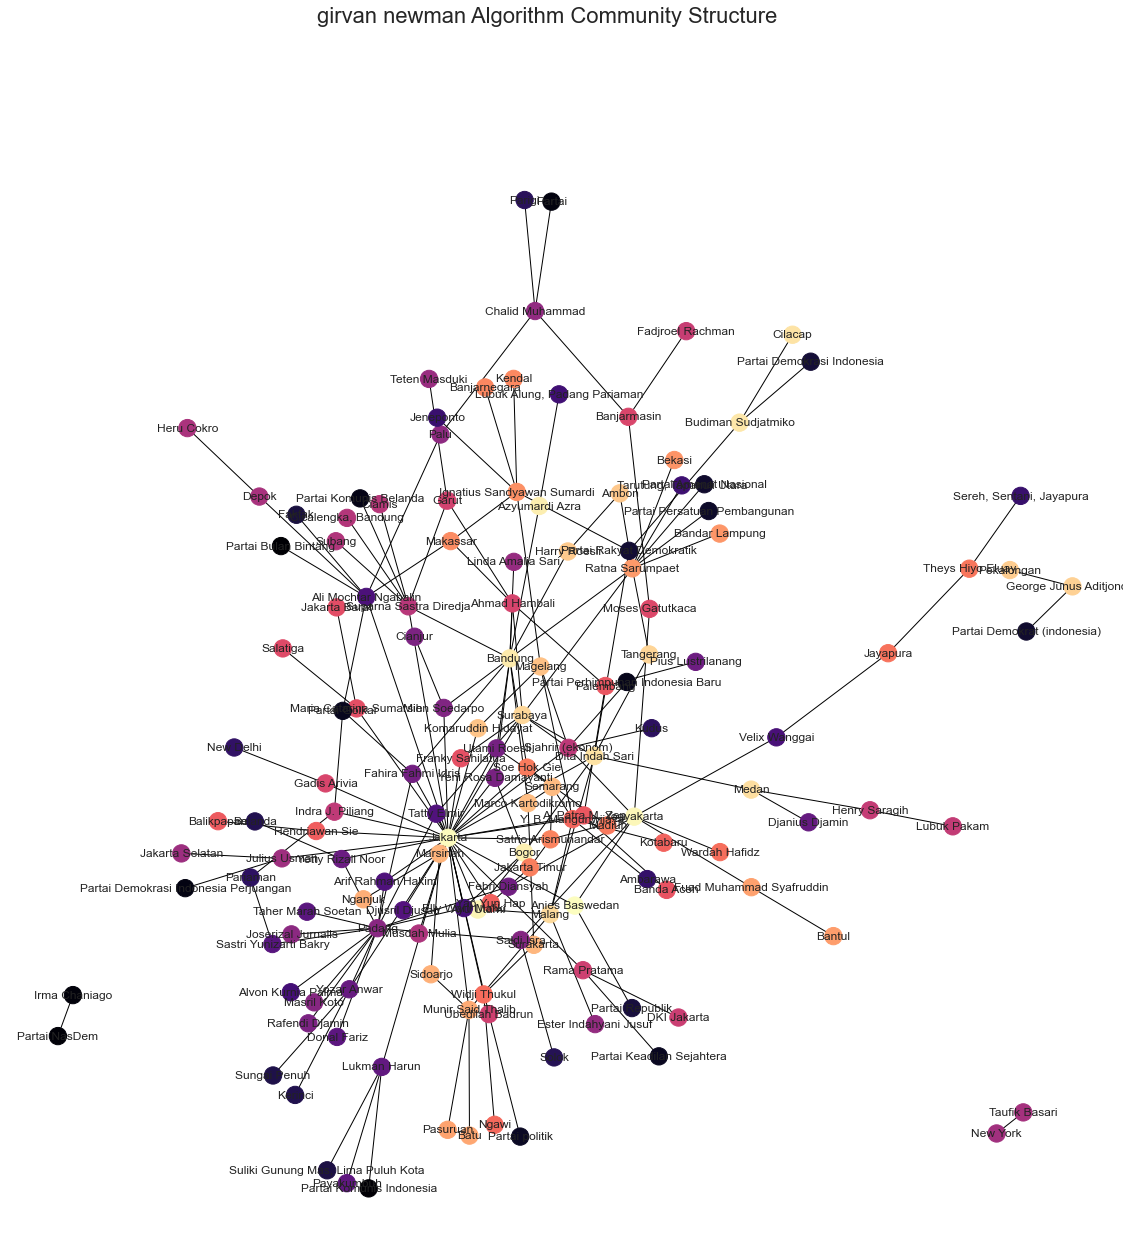

In [252]:
#Visualisasi Algoritma Community

#pos = nx.spring_layout(g, k=0.2)
#layout1 = nx.spring_layout(g, iterations=50, k=0.25)


plt.figure(figsize=(20,20))
#plt.box(on=None)
plt.axis('off')
#plt.show()
plt.suptitle('girvan newman Algorithm Community Structure',fontsize=22)

nx.draw_networkx(g, layout, cmap=plt.get_cmap('magma'),
    node_color=-community_df.komunitas, #node_size=50,
    font_color= "#222222",
    with_labels=True)

#print(-community_df.komunitas)


In [174]:
#Link Prediction dengan Jaccard

preds = nx.jaccard_coefficient(g)
for u, v, p in preds:
 if(p > 0.9): #jika nilai jaccard lebih dari 90%
     print (u, v, p) 

Kendal Banjarnegara 1.0
Kendal Jeneponto 1.0
Salatiga Jakarta Barat 1.0
Cilacap Partai Demokrasi Indonesia 1.0
Musdah Mulia Djusril Djusan 1.0
Payakumbuh Suliki Gunung Mas, Lima Puluh Kota 1.0
Payakumbuh Partai Komunis Indonesia 1.0
Alvon Kurnia Palma Masril Koto 1.0
Alvon Kurnia Palma Rafendi Djamin 1.0
Alvon Kurnia Palma Joserizal Jurnalis 1.0
Alvon Kurnia Palma Taher Marah Soetan 1.0
Alvon Kurnia Palma Donal Fariz 1.0
Banjarnegara Jeneponto 1.0
Partai Bulan Bintang Fakfak 1.0
Masril Koto Joserizal Jurnalis 1.0
Masril Koto Rafendi Djamin 1.0
Masril Koto Taher Marah Soetan 1.0
Masril Koto Donal Fariz 1.0
Kudus Partai Perhimpunan Indonesia Baru 1.0
Rafendi Djamin Joserizal Jurnalis 1.0
Rafendi Djamin Taher Marah Soetan 1.0
Rafendi Djamin Donal Fariz 1.0
Ciamis Cicalengka, Bandung 1.0
Ciamis Subang 1.0
Ciamis Partai Komunis Belanda 1.0
Partai Parigi 1.0
Kotabaru Ambarawa 1.0
Partai Komunis Belanda Cicalengka, Bandung 1.0
Partai Komunis Belanda Subang 1.0
Pekalongan Partai Demokrat (indo

In [ ]:
#==========
#  Graph Embedding
#==========

In [5]:
import networkx as nx
from node2vec import Node2Vec
import pandas as pd

In [29]:
df = pd.read_csv("fp-aktivis.csv")

#Membuat hubungan antar nama dengan atribut lainnya
df1= df[['nama', 'kota_terkait']].dropna(axis = 0, how ='any')
df2= df[['nama', 'kota_lahir']].dropna(axis = 0, how ='any')
df3= df[['nama', 'partai']].dropna(axis = 0, how ='any')

#Manambahkan hubungan node yang telah dibuat ke obj g
g = nx.from_pandas_edgelist(df1, source='nama', target='kota_terkait')
g.add_edges_from(df2.values.tolist())
g.add_edges_from(df3.values.tolist())
#g.edges()

In [32]:
#print(dir(g))
#print(dir(g.edges().keys()))
for i in g.edges().keys():
    print(i)

('Anies Baswedan', 'Jakarta')
('Anies Baswedan', 'Yogyakarta')
('Anies Baswedan', 'Partai Republik')
('Jakarta', 'Ayu Utami')
('Jakarta', 'Dita Indah Sari')
('Jakarta', 'Komaruddin Hidayat')
('Jakarta', 'Marsinah')
('Jakarta', 'Munir Said Thalib')
('Jakarta', 'Satrio Arismunandar')
('Jakarta', 'Soe Hok Gie')
('Jakarta', 'Widji Thukul')
('Jakarta', 'Y. B. Mangunwijaya')
('Jakarta', 'Yap Yun Hap')
('Jakarta', 'Hendriawan Sie')
('Jakarta', 'A. Patra M. Zen')
('Jakarta', 'Franky Sahilatua')
('Jakarta', 'Maria Catarina Sumarsih')
('Jakarta', 'Gadis Arivia')
('Jakarta', 'Ubedilah Badrun')
('Jakarta', 'Rama Pratama')
('Jakarta', 'Indra J. Piliang')
('Jakarta', 'Sjahrir (ekonom)')
('Jakarta', 'Suparna Sastra Diredja')
('Jakarta', 'Musdah Mulia')
('Jakarta', 'Julius Usman')
('Jakarta', 'Mien Soedarpo')
('Jakarta', 'Yeni Rosa Damayanti')
('Jakarta', 'Utami Roesli')
('Jakarta', 'Fahira Fahmi Idris')
('Jakarta', 'Yetty Rizali Noor')
('Jakarta', 'Yozar Anwar')
('Jakarta', 'Lukman Harun')
('Jakarta'

In [30]:
#Node2Vec

#Pembuatan model
node2vec = Node2Vec(g, dimensions=20,
    walk_length=16, num_walks=100, workers=2)
model = node2vec.fit(window=10, min_count=1)

#Node yang hampir sama
node_a= 'Jakarta'
node_b= 'Padang'
node_c= 'Bandung'
node_d= 'Yogyakarta'
node_e= 'Surabaya'

print("Node berdekatan maupun mirip dengan " +node_a +":")
print("--------------------------------------")
for node, _ in model.most_similar(node_a):
    print(node)
print("")
    
print("Node berdekatan maupun mirip dengan " +node_b +":")
print("--------------------------------------")
for node, _ in model.most_similar(node_b):
    print(node)
print("")
    
print("Node berdekatan maupun mirip dengan " +node_c +":")
print("--------------------------------------")
for node, _ in model.most_similar(node_c):
    print(node)
print("")
    
print("Node berdekatan maupun mirip dengan " +node_d +":")
print("--------------------------------------")
for node, _ in model.most_similar(node_d):
    print(node)
print("")

print("Node berdekatan maupun mirip dengan " +node_e +":")
print("--------------------------------------")
for node, _ in model.most_similar(node_e):
    print(node)
print("")

Computing transition probabilities: 100%|██████████████████████████████████████████| 147/147 [00:00<00:00, 3007.68it/s]


Node berdekatan maupun mirip dengan Jakarta:
--------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).


Djusril Djusan
Musdah Mulia
Yap Yun Hap
Julius Usman
Hendriawan Sie
Maria Catarina Sumarsih
Gadis Arivia
Lukman Harun
A. Patra M. Zen
Balikpapan

Node berdekatan maupun mirip dengan Padang:
--------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).


Joserizal Jurnalis
Taher Marah Soetan
Donal Fariz
Rafendi Djamin
Masril Koto
Arif Rahman Hakim
Alvon Kurnia Palma
Febri Diansyah
Sastri Yunizarti Bakry
Saldi Isra

Node berdekatan maupun mirip dengan Bandung:
--------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).


Linda Amalia Sari
Harry Roesli
Ambon
Azyumardi Azra
Utami Roesli
Marco Kartodikromo
Mien Soedarpo
Soe Hok Gie
Lubuk Alung, Padang Pariaman
Yeni Rosa Damayanti

Node berdekatan maupun mirip dengan Yogyakarta:
--------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).


Wardah Hafidz
Febri Diansyah
Velix Wanggai
Fuad Muhammad Syafruddin
Moses Gatutkaca
Saldi Isra
Jayapura
Satrio Arismunandar
Bantul
Solok

Node berdekatan maupun mirip dengan Surabaya:
--------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).


Franky Sahilatua
Tatty Elmir
Tarutung, Tapanuli Utara
Ratna Sarumpaet
Bekasi
Marsinah
Tangerang
Bandar Lampung
Partai Amanat Nasional
Partai Persatuan Pembangunan



In [102]:
#TSNE Python

#print(dir(sklearn.manifold))

from sklearn.manifold import TSNE
import numpy as np

#embedding mahasiswa saja
df1_ = df[['nama', 'kota_terkait']].dropna(axis = 0, how ='any')
df2_ = df[['nama', 'kota_lahir']].dropna(axis = 0, how ='any')
df3_ = df[['nama', 'partai']].dropna(axis = 0, how ='any')

df_= pd.concat([df1_, df2_, df3_])
df_kota_= pd.concat([df1_, df2_])
df_nama= df_.nama.unique()
df_kota= pd.concat([df1_.kota_terkait, df2_.kota_lahir]).unique()

node_aktivis = [x for x in df_kota_.nama]
#for x in df_.kota_terkait.unique():
#    node_aktivis.append(x)
#for x in df_.kota_lahir.unique():
#    node_aktivis.append(x)
#for x in df_.partai.unique():
#    node_aktivis.append(x)
    
embeddings = np.array([model.wv[x] for x in node_aktivis])
#for x in node_aktivis:
#    print(x +" : " +str(model.wv[x]))
tsne = TSNE(n_components=2, random_state=7,
perplexity=15)
embeddings_2d = tsne.fit_transform(embeddings)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  app.launch_new_instance()


Jakarta
Yogyakarta
Bogor
Bandung
Cilacap
Medan
Malang
Surabaya
Tangerang
Pekalongan
Ambon
Magelang
Semarang
Surakarta
Sidoarjo
Nganjuk
Batu
Pasuruan
Bantul
Bandar Lampung
Bekasi
Makassar
Kendal
Banjarnegara
Jakarta Timur
Madiun
Jayapura
Ngawi
Kotabaru
Balikpapan
Palembang
Banda Aceh
Jakarta Barat
Salatiga
Banjarmasin
Garut
DKI Jakarta
Lubuk Pakam
Ciamis
Cicalengka, Bandung
Subang
Depok
New York
Jakarta Selatan
Palu
Padang
Cianjur
Payakumbuh
Lubuk Alung, Padang Pariaman
Tarutung, Tapanuli Utara
Jeneponto
Sereh, Sentani, Jayapura
Ambarawa
New Delhi
Pariaman
Kudus
Parigi
Solok
Belanda
Kerinci
Sungai Penuh
Suliki Gunung Mas, Lima Puluh Kota
Fakfak


In [163]:
#Visualisasi Embeding Berdasarkan Dosen Pembimbing 1

warna_dospem1 = {
 'Nur Aini Rakhmawati': 'lightblue',
 'Radityo Prasetianto': 'b',
 'Renny Pradina': 'r',
 'Faizal Johan Atletiko': 'teal'
}

colors= dict() 
for node, degree in deg_sort:
    if node in df['kota_terkait'].values or node in df['kota_lahir'].values:
        color = degree *np.array([1.2, 14.2, 5.2])
        color= np.random.rand(3,); #(r, g, b)
        color= {str(node): color}
        colors.update(color)
        
        
#colors= dict() 
#for x in df_kota:
#    x = [0, 1, 2]
#    y = [0, 1, 2]

#    r = np.random.rand()
#    b = np.random.rand()
#    g = random.random()
#    color = np.random.rand(3,); #(r, g, b)
#    print("x: " +str(x))
#    a= {str(x): color}
#    print("a: " +str(a))
#    colors.update(a)
    
    
colors_plot= []    
    
for kota_lahir, kota_terkait, nama in df_kota_.values:
    try:
        colors_plot.append(colors[kota_terkait])
    except:
        colors_plot.append(colors[kota_lahir])
    
for x in colors_plot:
    print(x)

#df['color'] = df['dosen1'].apply(lambda x: warna_dospem1[x])
#df['dosen1'].apply(lambda x: print(x))
#print(df)
#warna_mhs= dict(zip(df['mhs'], df['color']))
#colors = [warna_mhs[x] for x in df.mhs]
#print(colors)

kota_lahir
kota_terkait
nama
[0.63812704 0.14960142 0.49179874]
[0.28190361 0.33113994 0.18210573]
[0.63812704 0.14960142 0.49179874]
[0.68849342 0.92450041 0.11377817]
[0.4528164  0.84731985 0.17847061]
[0.84426743 0.21114816 0.91626235]
[0.84426743 0.21114816 0.91626235]
[0.08120011 0.91486985 0.81063669]
[0.63812704 0.14960142 0.49179874]
[0.161385   0.68153611 0.09788934]
[0.83745778 0.69551565 0.04287573]
[0.68849342 0.92450041 0.11377817]
[0.20803699 0.99961198 0.8952728 ]
[0.11592393 0.65331981 0.32011266]
[0.36502423 0.81596393 0.97415599]
[0.4528164  0.84731985 0.17847061]
[0.63812704 0.14960142 0.49179874]
[0.97302807 0.07203986 0.08759993]
[0.4528164  0.84731985 0.17847061]
[0.11033755 0.75563006 0.71814471]
[0.68619473 0.70504819 0.92892429]
[0.63812704 0.14960142 0.49179874]
[0.83745778 0.69551565 0.04287573]
[0.78608433 0.37581256 0.56997645]
[0.7887292  0.1259909  0.36204281]
[0.12758212 0.7405323  0.23797644]
[0.63812704 0.14960142 0.49179874]
[0.161385   0.68153611 0.0

In [60]:
print(np.random.rand(3,))

[0.37690986 0.11016765 0.92812648]


Text(0.5, 0.98, 'Plot Berdasarkan Kota')

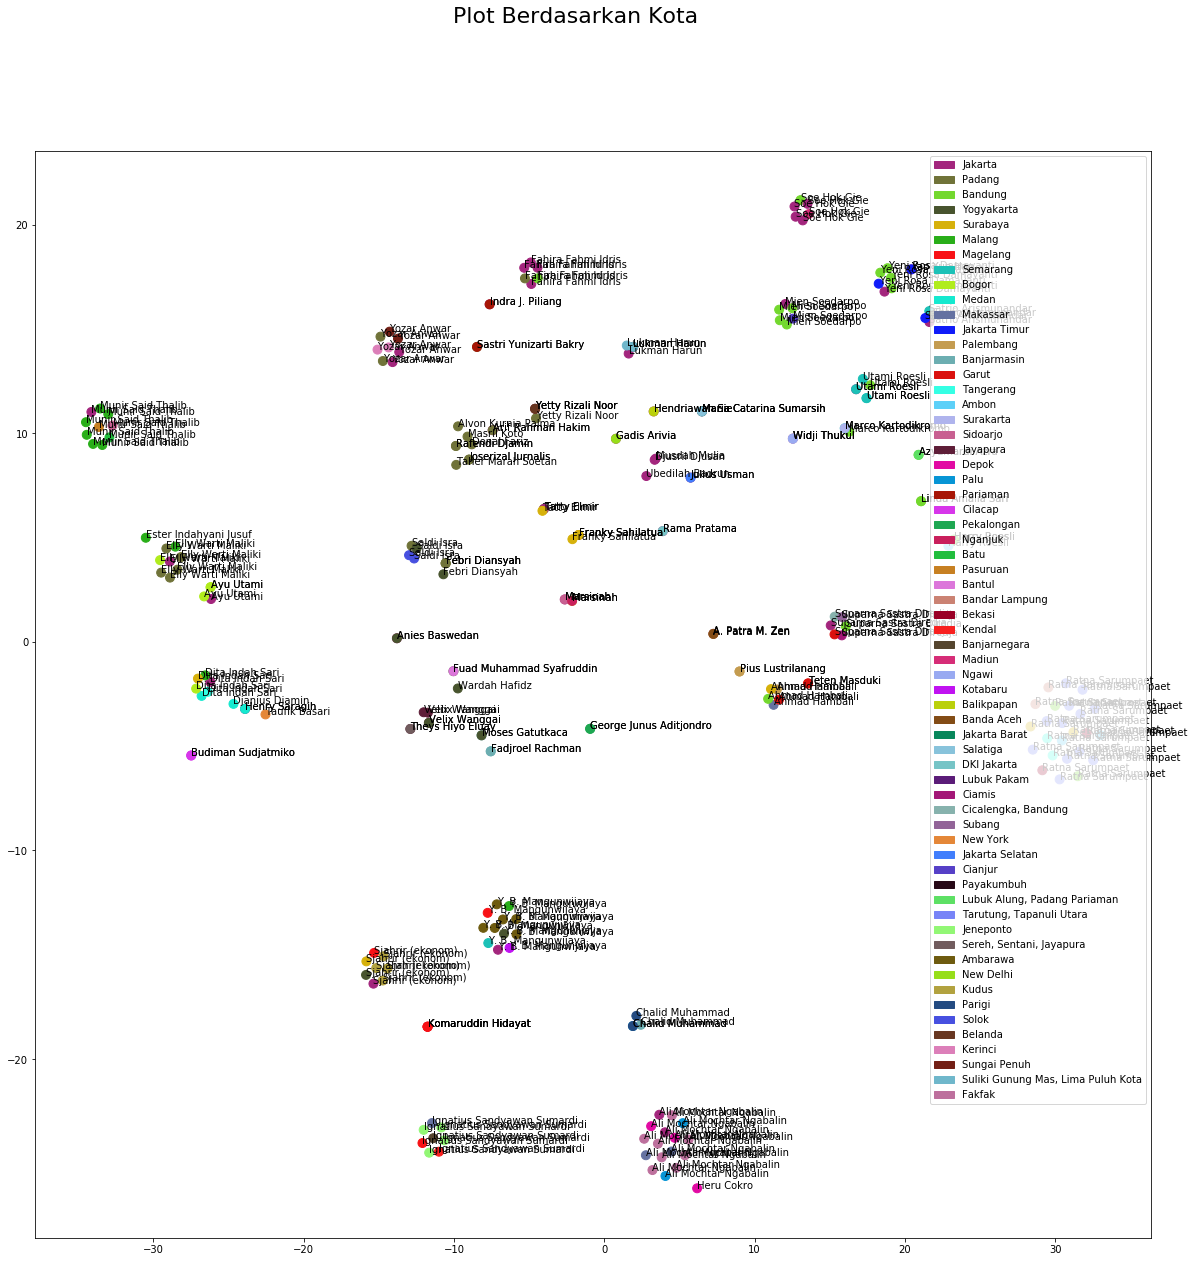

In [164]:
#Visualisasi Embeding Berdasarkan Dosen Pembimbing 1

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(20, 20))
ax = figure.add_subplot(111)
ax.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=colors_plot, s= 80)
i=0
for akt in node_aktivis:
 ax.annotate(akt, (embeddings_2d[i, 0], embeddings_2d[i, 1]))
 i=i+1
legend = [mpatches.Patch(color=color, label=kota) for kota, color in colors.items()]
ax.legend(handles=legend);
plt.suptitle('Plot Berdasarkan Kota', fontsize=22)